# Regression

Regression is to estimate the relationship between one or more features (explanatory variables) and the continuous target value (respone variable). Many industrial applications utilize regression analysis to understand the correlation of different variables and try to predict what'd happen in the future.

# Linear Regression

Linear regression is divided into two categories: **simple linear regression** and **multiple linear regression**. Simple linear regression models the relation of two variables which are a single feature and the continuous target value. You can simply think of a simple linear regression as a function with one independent variable and a related dependent variable.

- $y = w_0 + w_1x$, where $w_0$ is a y-intercept and $w_1$ is a feature weight for $x$.

A simple linear regression can further generalize to a multiple linear regression where the number of features are more than one.

- $y = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum^m_{i=0}w_ix_i = w^Tx$, where $w_0$ is a y-intercept and $x_0$ is 1.

Load the Boston Housing dataset from UCI Machine Learning Repository (which is currently unavailable) or from [data](./data/) folder. The features of Boston Housing dataset are as follows (information from UCI Machine Learning Repository):
1. **CRIM**:      per capita crime rate by town
2. **ZN**:        proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**:     proportion of non-retail business acres per town
4. **CHAS**:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX**:       nitric oxides concentration (parts per 10 million)
6. **RM**:        average number of rooms per dwelling
7. **AGE**:       proportion of owner-occupied units built prior to 1940
8. **DIS**:       weighted distances to five Boston employment centres
9. **RAD**:       index of accessibility to radial highways
10. **TAX**:      full-value property-tax rate per \$10,000
11. **PTRATIO**:  pupil-teacher ratio by town
12. **B**:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT**:    % lower status of the population
14. **MEDV**:     Median value of owner-occupied homes in \$1000's

In [1]:
import pandas as pd

# load Boston Housing dataset from local repository
df = pd.read_csv('./data/boston.csv', header=0, sep=',')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

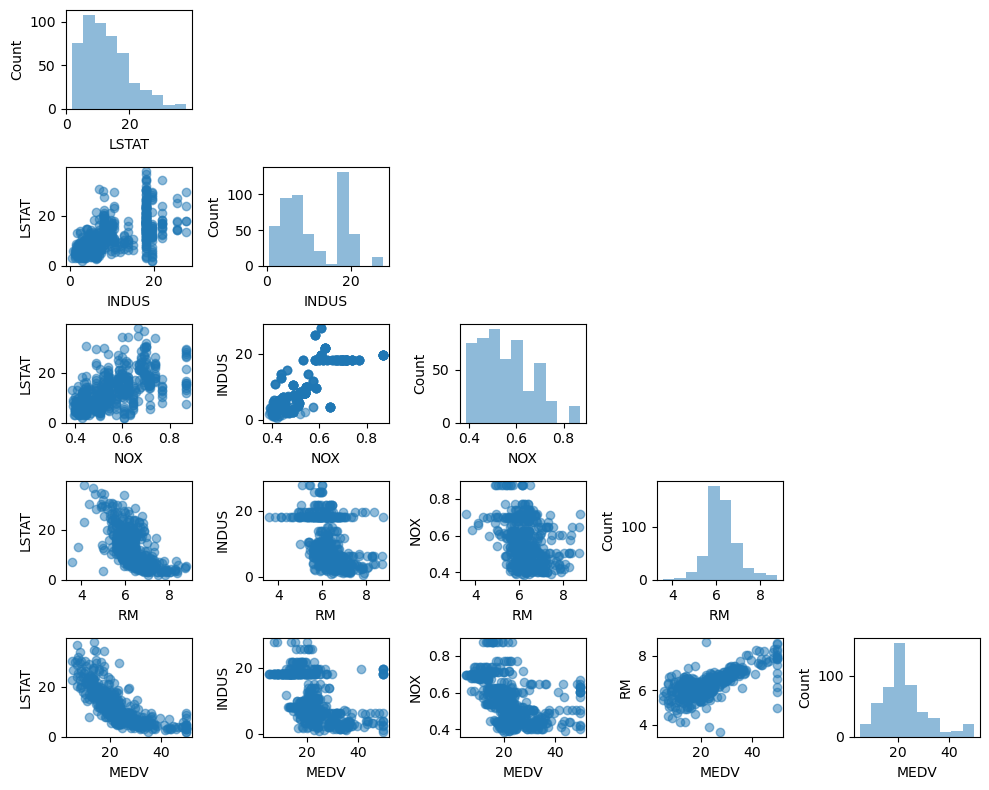

In [3]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].to_numpy(), figsize=(10, 8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

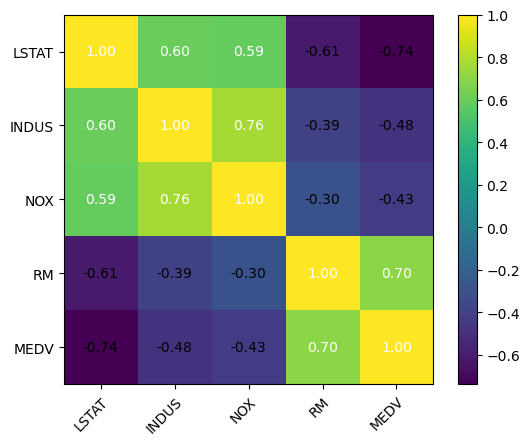

In [4]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df[cols].to_numpy().T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

Ordinary least squares (OLS) is the simplest method to estimate the parameters of a linear regression model by minimizing the sum of squared residual (orthogonal distance error between the regression line and sample). OLS method is basically the same cost function used in adaptive linear neuron (Adaline), except OLS uses continuous target value whereas Adaline utilizes class label as their prediction.

$J(w) = {1\over2} \displaystyle\sum^n_{i=1} (y^i-\hat{y}^i)^2 $ where $\hat{y}$ represents prediction ($\hat{y} = w^Tx$).

In [5]:
class LinearRegressionGD(object):
    def __init__(self, lr=0.001, epochs=20):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for _ in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.lr * X.T.dot(errors)
            self.w_[0] += self.lr * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Logistic regression doesn't have unit step function to get a value of -1 or 1.
    # Instead, it returns the continuous target value.
    def predict(self, X):
        return self.net_input(X)

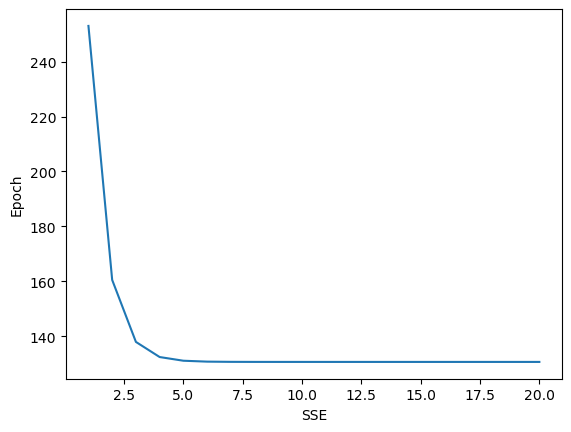

In [6]:
from sklearn.preprocessing import StandardScaler
xsc = StandardScaler()
ysc = StandardScaler()

x = df['RM'].to_numpy()[:, np.newaxis]
y = df['MEDV'].to_numpy()
x_std = xsc.fit_transform(x)
y_std = ysc.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(x_std, y_std)
plt.plot(range(1, lr.epochs + 1), lr.cost_)
plt.xlabel('SSE')
plt.ylabel('Epoch')
plt.show()

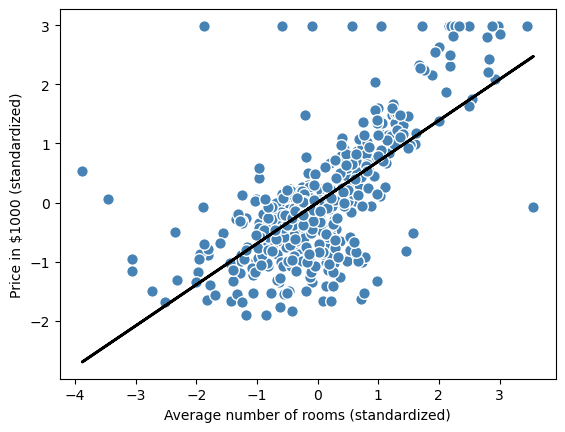

In [7]:
from utils import lin_regplot

lin_regplot(x_std, y_std, lr)
plt.xlabel('Average number of rooms (standardized)')
plt.ylabel('Price in $1000 (standardized)')
plt.show()

In [8]:
# House price with 3 rooms
rm_std = xsc.transform(np.array([[6.0]]))
medv_std = lr.predict(rm_std)
print('House price with 6 rooms (RM = 6.0): $%.3f' % (ysc.inverse_transform(medv_std.reshape(-1, 1))*1000))

House price with 6 rooms (RM = 6.0): $19942.035


scikit-learn's linear regression model performs better on unstandardized features, because it does not use gradient descent optimization.

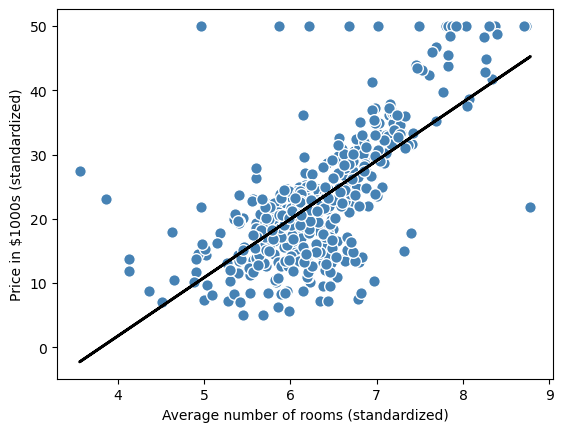

In [9]:
from sklearn.linear_model import LinearRegression

sklearn_lr = LinearRegression()
sklearn_lr.fit(x, y)
lin_regplot(x, y, sklearn_lr)
plt.xlabel('Average number of rooms (standardized)')
plt.ylabel('Price in $1000s (standardized)')
plt.show()

# RANSAC

Sometimes, the linear regression model can be heavily influenced by some outliers. Therefore, [Random Sample Consensus (RANSAC)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) algorithm can be used to make a model more stable by managing outliers in the dataset. The process of RANSAC algorithm can be summarized as follows:
1. Choose random samples as inliers and train the model.
2. Test rest of samples using the trained model. Add samples as inliers if they are in a permissible error range.
3. Re-train the model using all inliers.
4. Estimate the error between target value and predicted value deduced by trained model.
5. Terminate the process if the performance reaches the user-defined residual threshold value or the number of iteration satisfies. Else, repeat from step 1.

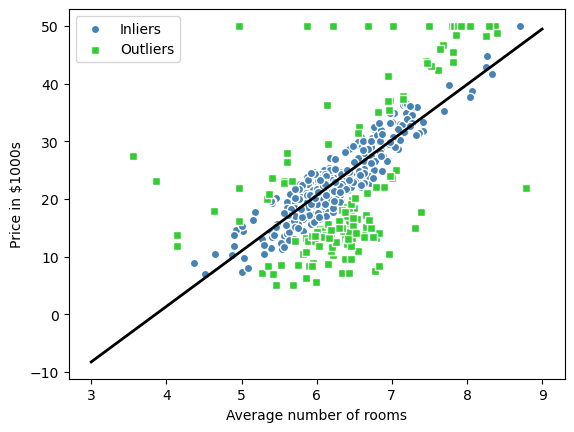

In [10]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(
    estimator=LinearRegression(),
    min_samples=50,
    residual_threshold=5.0,
    max_trials=100,
    loss='absolute_error',
    random_state=1
)
ransac.fit(x, y)
inlier = ransac.inlier_mask_
outlier = np.logical_not(inlier)
rm = np.arange(3, 10, 1)
medv = ransac.predict(rm[:, np.newaxis])
plt.scatter(x[inlier], y[inlier], c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(x[outlier], y[outlier], c='limegreen', edgecolor='white', marker='s', label='Outliers')
plt.plot(rm, medv, color='black', lw=2)
plt.xlabel('Average number of rooms')
plt.ylabel('Price in $1000s')
plt.legend(loc='best')
plt.show()

In [11]:
medv = ransac.predict(np.array([6.0])[:, np.newaxis])
print('House price with 6 rooms (RM = 6.0): $%.3f' % (medv*1000))

House price with 6 rooms (RM = 6.0): $20590.849


# Evaluation 

Use all features in the Boston housing dataset to train a multivariate linear regression model. Since the model uses multiple features, we cannot display a single linear regression line as a 2-dimentional graph (known as hyperplane). Instead, we use residual plot to evaluate the model and identify non-linearity and/or outliers.

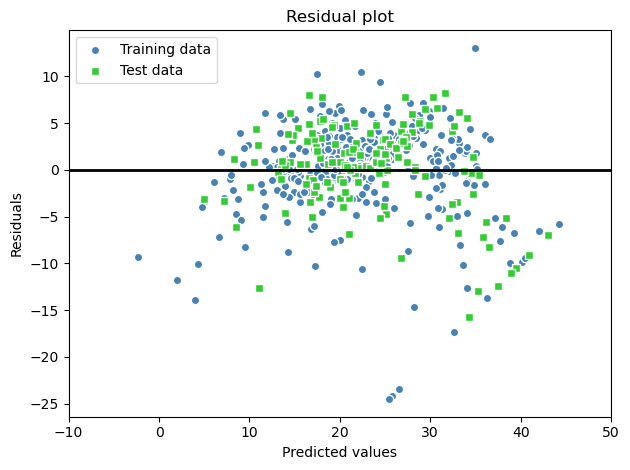

In [12]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1].to_numpy()
y = df['MEDV'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
sklearn_lr = LinearRegression()
sklearn_lr.fit(x_train, y_train)
y_train_pred = sklearn_lr.predict(x_train)
y_test_pred = sklearn_lr.predict(x_test)
plt.title('Residual plot')
plt.scatter(y_train_pred, (y_train_pred - y_train), c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, (y_test_pred - y_test), c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Beside residual plot, the other method to quantitatively evaluate the model performace is mean squared error (MSE). MSE is an average of SSE.

- $MSE = {1\over n} \displaystyle\sum^n_{i=1} (y^i-\hat{y}^i)^2 $

In [13]:
from sklearn.metrics import mean_squared_error

print('Train MSE: %.3f, Test MSE: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Train MSE: 23.513, Test MSE: 19.831


Coefficient of determination ($R^2$) is a generalized version of MSE.

- $R^2 = 1 - {SSE \over SST} = 1 - {MSE \over Var(y)}$

- Total sum of squares: $SST = \displaystyle\sum^n_{i=1} (y^i-\mu_y)^2$

In [14]:
from sklearn.metrics import r2_score

print("Train R^2: %.3f, Test R^2: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

Train R^2: 0.710, Test R^2: 0.784


# Polynomial Regression

If the relationship between the features and target is non-linear, you can use **polynomial regression** instead of a linear regression model.

- $y = w_0 + w_1x + w_2x^2 + ... + w_dx^d$ where $d$ is a degree of polynomial expression.

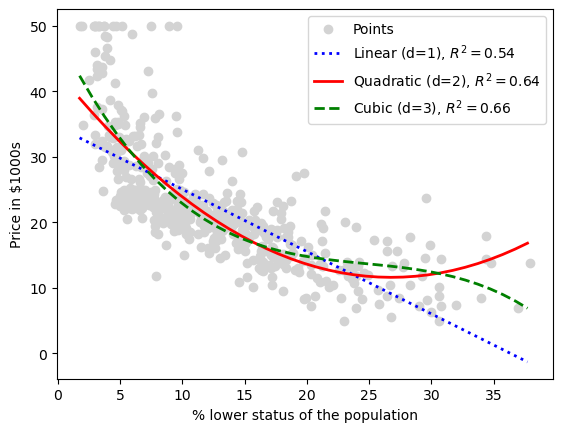

In [15]:
from sklearn.preprocessing import PolynomialFeatures

x = df['LSTAT'].to_numpy()[:, np.newaxis]
y = df['MEDV'].to_numpy()
lr = LinearRegression()
# quadratic and cubic polynomial features
quad = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
x_quad = quad.fit_transform(x)
x_cubic = cubic.fit_transform(x)
f_range = np.arange(x.min(), x.max(), 1)[:, np.newaxis]

# linear
lr.fit(x, y)
f_lin_pred = lr.predict(f_range)
linear_r2 = r2_score(y, lr.predict(x))

# quadratic
lr.fit(x_quad, y)
f_quad_pred = lr.predict(quad.fit_transform(f_range))
quad_r2 = r2_score(y, lr.predict(x_quad))

# cubic
lr.fit(x_cubic, y)
f_cubic_pred = lr.predict(cubic.fit_transform(f_range))
cubic_r2 = r2_score(y, lr.predict(x_cubic))

plt.scatter(x, y, label='Points', color='lightgray')
plt.plot(f_range, f_lin_pred, label='Linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(f_range, f_quad_pred, label='Quadratic (d=2), $R^2=%.2f$' % quad_r2, color='red', lw=2, linestyle='-')
plt.plot(f_range, f_cubic_pred, label='Cubic (d=3), $R^2=%.2f$' % cubic_r2, color='green', lw=2, linestyle='--')
plt.xlabel('% lower status of the population')
plt.ylabel('Price in $1000s')
plt.legend(loc='best')
plt.show()

# Random Forest Regression

Decision tree and random forest regression are conceptually different regression models from what we have seen in this guide previously. As mentioned in the chapter 3, the decision tree algorithm tries to maximize the information gain in each node by using one of three metrics. In regression, we use MSE as our impurity metric of node to maximize the information gain.


- $I(t) = MSE(t) = {1 \over N_t} \displaystyle \sum_{i\in{D_t}}(y^i - \hat{y}_t)^2$

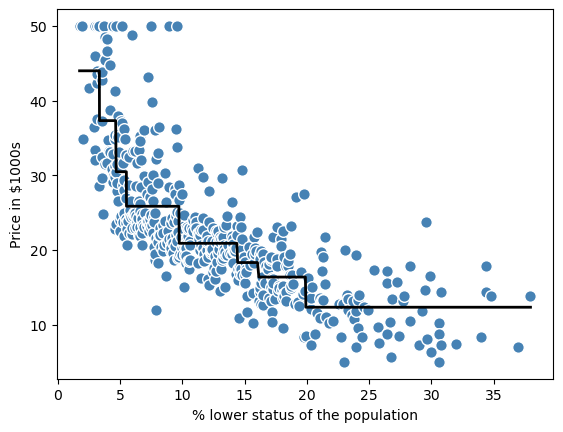

In [16]:
from sklearn.tree import DecisionTreeRegressor

x = df['LSTAT'].to_numpy()[:, np.newaxis]
y = df['MEDV'].to_numpy()
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x, y)
sort_idx = x.flatten().argsort()
lin_regplot(x[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population')
plt.ylabel('Price in $1000s')
plt.show()

As shown above, decision tree regression catches the general trend of the data, but has a difficulty to estimate the data beyond (outside) the range of training dataset.

Train MSE: 1.644, Test MSE: 11.085
Train R^2: 0.979, Test R^2: 0.877


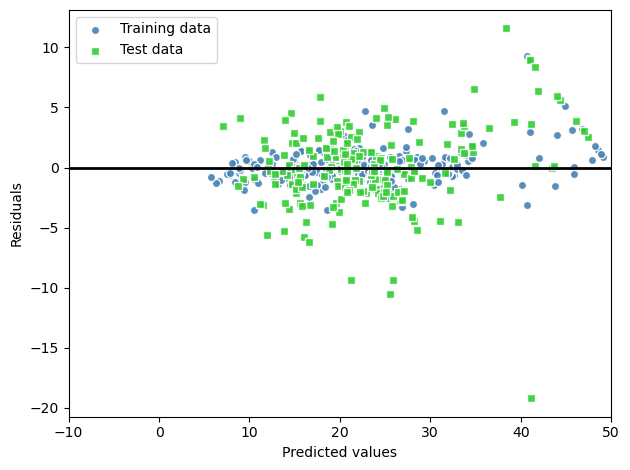

In [17]:
from sklearn.ensemble import RandomForestRegressor

x = df.iloc[:, :-1].to_numpy()
y = df['MEDV'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1, n_jobs=-1)
forest.fit(x_train, y_train)
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)
print('Train MSE: %.3f, Test MSE: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('Train R^2: %.3f, Test R^2: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
# residual plot
plt.scatter(y_train_pred, (y_train - y_train_pred), c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9, label='Training data')
plt.scatter(y_test_pred, (y_test - y_test_pred), c='limegreen', edgecolor='white', marker='s', s=35, alpha=0.9, label='Test data' )
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.xlim([-10, 50])
plt.legend(loc='best')
plt.tight_layout()
plt.show()